In [23]:
import os
import pandas as pd
from statistics import mean
os.chdir('D:/Phython/DAY 3')
df=pd.read_csv('Airpassengers.csv')

In [24]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [25]:
df.columns

Index(['Month', '#Passengers'], dtype='object')

In [26]:
df.columns=['Date','Numberofpassenger']
df.head

<bound method NDFrame.head of         Date  Numberofpassenger
0    1949-01                112
1    1949-02                118
2    1949-03                132
3    1949-04                129
4    1949-05                121
..       ...                ...
139  1960-08                606
140  1960-09                508
141  1960-10                461
142  1960-11                390
143  1960-12                432

[144 rows x 2 columns]>

In [27]:
def add(x,y):     #Define function
    print(x+y)

In [28]:
add(5,7)

12


In [32]:
#HOW TO DEFINE  A FUNCTION

def myfunc(df):                             #standard way (TRY LAMDA FUNCTION)
    print(df['Numberofpassenger'].mean())

In [33]:
myfunc(df)

280.2986111111111


In [29]:
df.Numberofpassenger.mean()            
def myfun(df):     
    print(mean(df))
    

In [30]:
myfun(df.Numberofpassenger)

280.2986111111111


In [43]:
import matplotlib.pyplot as plt
def plot_df(df,x,y,title="",xlabel='Date',ylabel='Numberofpassenger',dpi=100):
    plt.figure(figsize=(15,4),dpi=dpi)
    plt.plot(x,y,color='tab:red')
    plt.gca().set(title=title,xlabel=xlabel,ylabel=ylabel)
    #plt.xticks(rotation=45)
    plt.show


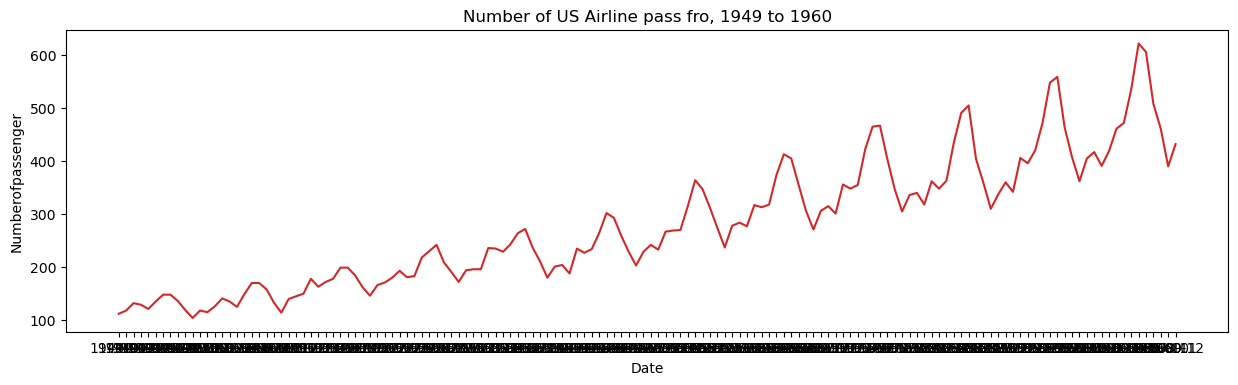

In [44]:
plot_df(df,x=df['Date'],y=df['Numberofpassenger'], title='Number of US Airline pass fro, 1949 to 1960')

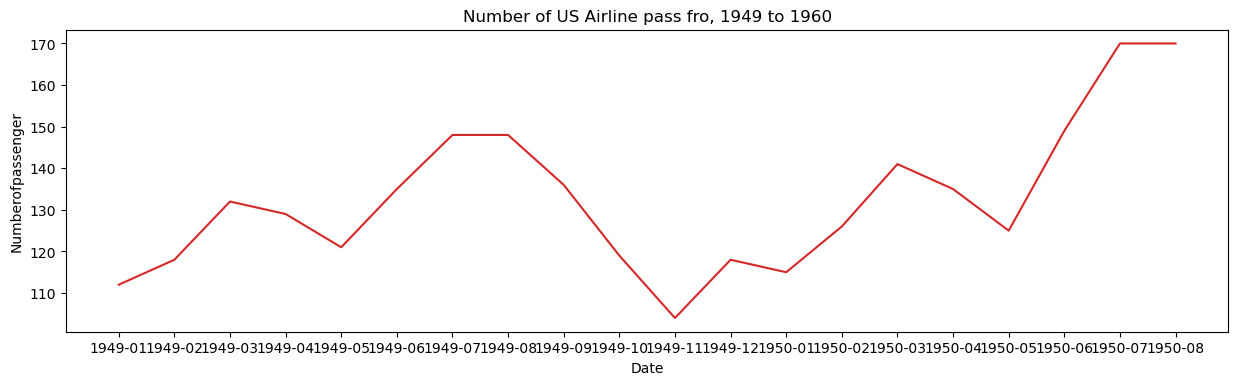

In [45]:
df1=df.head(20)
plot_df(df1,x=df1['Date'],y=df1['Numberofpassenger'], title='Number of US Airline pass fro, 1949 to 1960')

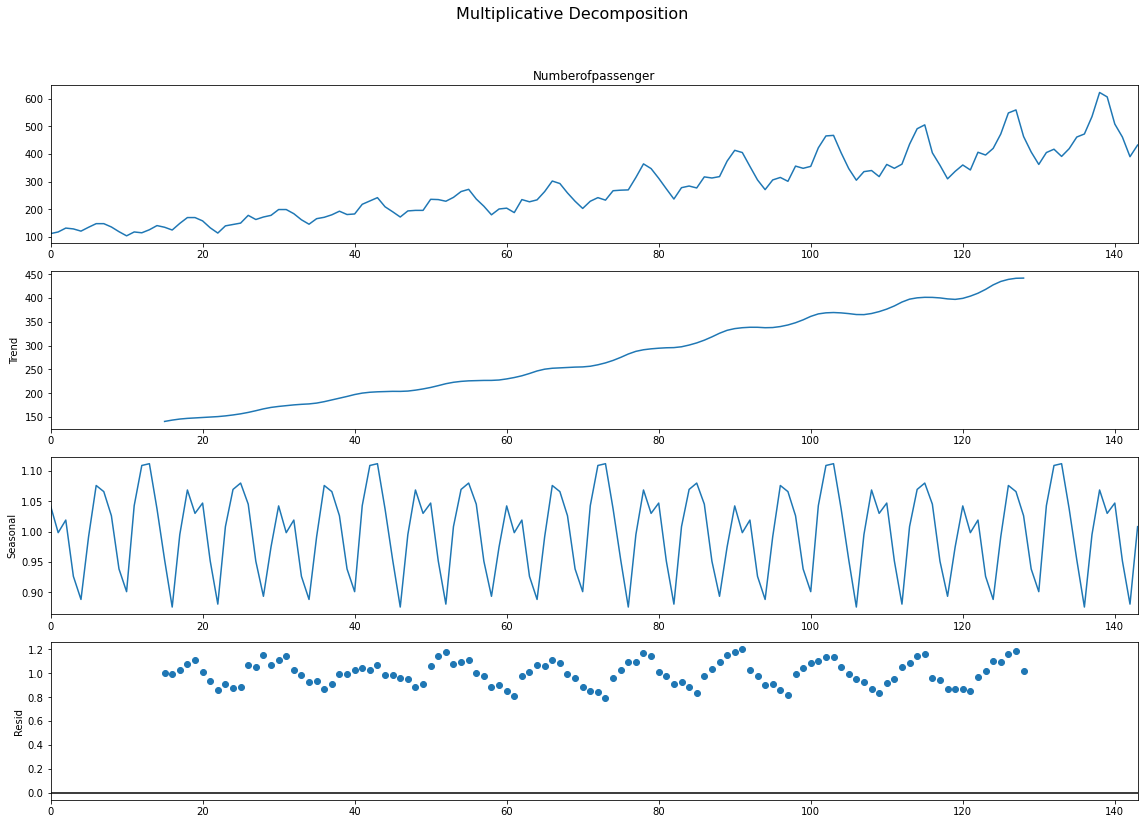

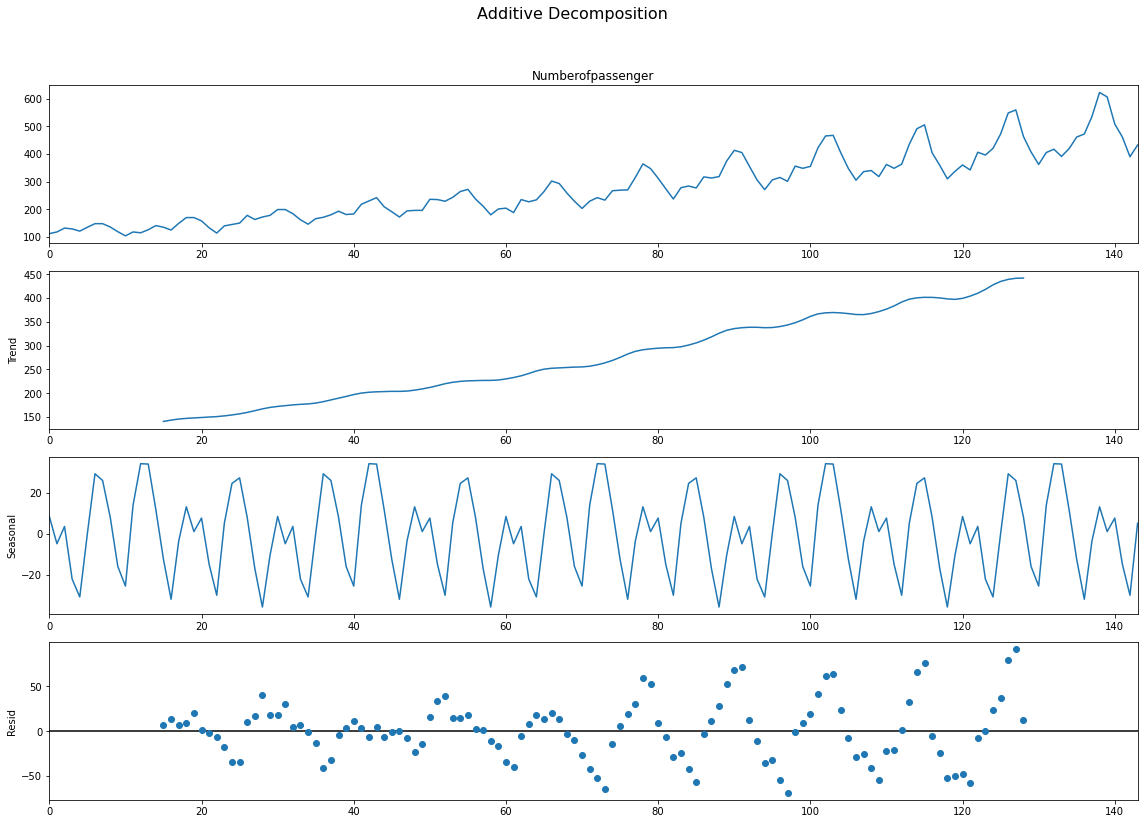

In [46]:
#decomposition of my title series
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Numberofpassenger'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Numberofpassenger'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [47]:
#HOW TO MAKE YOUR SERIES STATIONARY
df

,Date,Numberofpassenger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [49]:
df['#Passengers_diff']=df['Numberofpassenger']-df['Numberofpassenger'].shift(1)


In [50]:
df

,Date,Numberofpassenger,#Passengers_diff
0,1949-01,112,NaN
1,1949-02,118,6.0
2,1949-03,132,14.0
3,1949-04,129,-3.0
4,1949-05,121,-8.0
...,...,...,...
139,1960-08,606,-16.0
140,1960-09,508,-98.0
141,1960-10,461,-47.0
142,1960-11,390,-71.0


<AxesSubplot:>

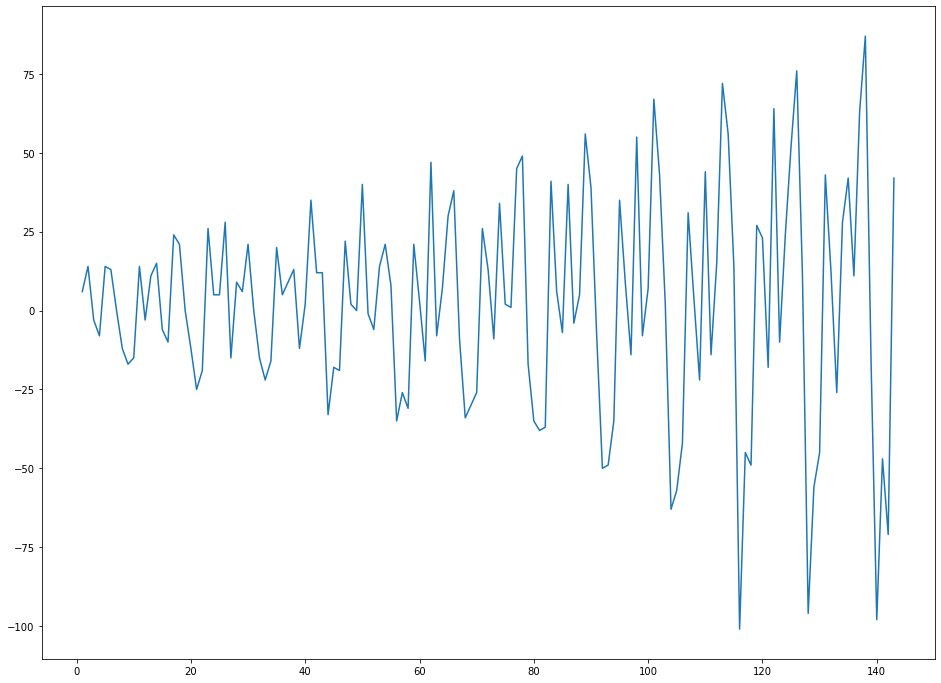

In [51]:
df['#Passengers_diff'].dropna().plot()

In [ ]:
#SEASONAL DIfference meaning-y(t)=y(t)-y(t-n)

In [52]:
df['#Passengers_diff_7']=df['Numberofpassenger']-df['Numberofpassenger'].shift(7)
df

,Date,Numberofpassenger,#Passengers_diff,#Passengers_diff_7
0,1949-01,112,NaN,NaN
1,1949-02,118,6.0,NaN
2,1949-03,132,14.0,NaN
3,1949-04,129,-3.0,NaN
4,1949-05,121,-8.0,NaN
...,...,...,...,...
139,1960-08,606,-16.0,189.0
140,1960-09,508,-98.0,117.0
141,1960-10,461,-47.0,42.0
142,1960-11,390,-71.0,-71.0


In [53]:
df.head(9)

,Date,Numberofpassenger,#Passengers_diff,#Passengers_diff_7
0,1949-01,112,NaN,NaN
1,1949-02,118,6.0,NaN
2,1949-03,132,14.0,NaN
3,1949-04,129,-3.0,NaN
4,1949-05,121,-8.0,NaN
5,1949-06,135,14.0,NaN
6,1949-07,148,13.0,NaN
7,1949-08,148,0.0,36.0
8,1949-09,136,-12.0,18.0


<AxesSubplot:>

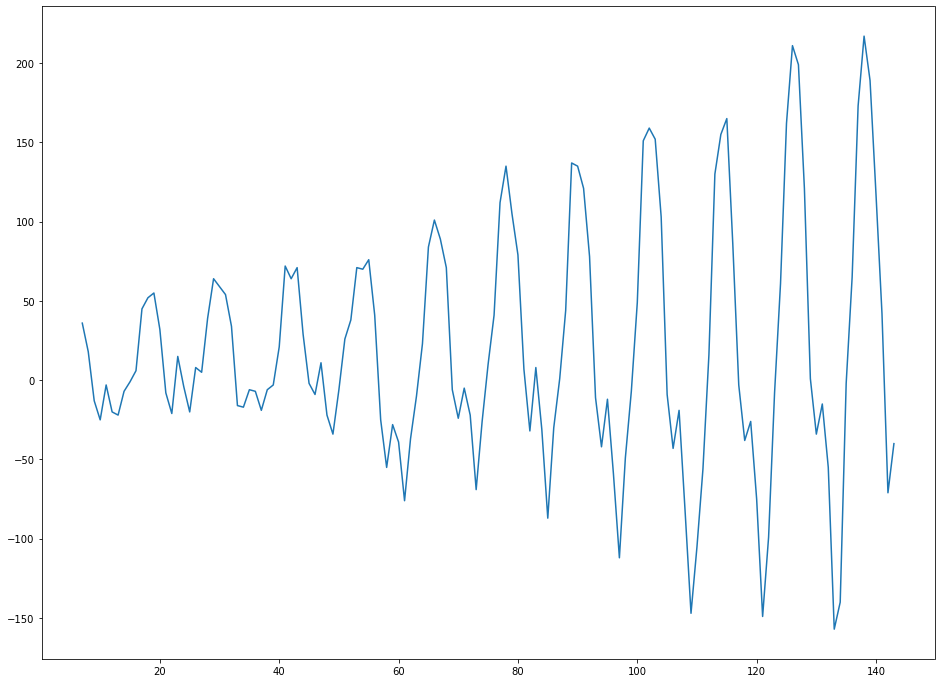

In [54]:
df['#Passengers_diff_7'].dropna().plot()